In [ ]:
# Title - TAXI FARE PREDICTION

In [ ]:
# Step 1 : Data Gathering
import pandas as pd
df = pd.read_csv('/content/NYC Taxi Data.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40012 entries, 0 to 40011
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  40012 non-null  object 
 1   vendor_id           40012 non-null  int64  
 2   pickup_datetime     40012 non-null  object 
 3   dropoff_datetime    40012 non-null  object 
 4   passenger_count     40012 non-null  int64  
 5   pickup_longitude    40012 non-null  float64
 6   pickup_latitude     40012 non-null  float64
 7   dropoff_longitude   40012 non-null  float64
 8   dropoff_latitude    40012 non-null  float64
 9   store_and_fwd_flag  40012 non-null  object 
 10  trip_duration       40012 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 3.4+ MB


In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,40012.000000,40012.000000,40012.000000,40012.000000,40012.000000,40012.000000,40012.000000
mean,1.531316,1.666300,-73.973478,40.751319,-73.973286,40.752059,938.514971
std,0.499025,1.317871,0.037834,0.027907,0.036908,0.032635,3032.259028
min,1.000000,1.000000,-74.393555,40.575092,-74.398514,40.556324,1.000000
25%,1.000000,1.000000,-73.991707,40.737640,-73.991327,40.735975,394.000000
50%,2.000000,1.000000,-73.981628,40.754631,-73.979622,40.754761,660.000000
75%,2.000000,2.000000,-73.966911,40.768650,-73.962776,40.770176,1069.250000
max,2.000000,6.000000,-73.518051,41.091171,-72.711395,41.311520,86357.000000


In [ ]:
print("No. of rows = ",df.shape[0])
print("No. of columns = ",df.shape[1])

No. of rows =  40012
No. of columns =  11


In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Step 2 : Exploratory Data Analysis
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

<ipython-input-8-512fb7e94d6c>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
<ipython-input-8-512fb7e94d6c>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])


In [ ]:
# extracting pickup & dropoff month
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_month'] = df['dropoff_datetime'].dt.month
# extracting pickup & dropoff date
df['pickup_date'] = df['pickup_datetime'].dt.weekday
df['dropoff_date'] = df['dropoff_datetime'].dt.weekday
# extracting pickup & dropoff hours
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] =df['dropoff_datetime'].dt.hour
# extracting pickup and dropoff day name
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
# extracting pickup and dropoff weekday name
df['pickup_weekday'] =df['pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['dropoff_datetime'].dt.weekday

In [ ]:
df['trip_duration_mins'] = df['trip_duration']/60

In [ ]:
from geopy.distance import great_circle
df['distance'] = df.apply(lambda row: great_circle((row['pickup_latitude'], row["pickup_longitude"]), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)

Text(0.5, 1.0, 'Store and Forward Flag')

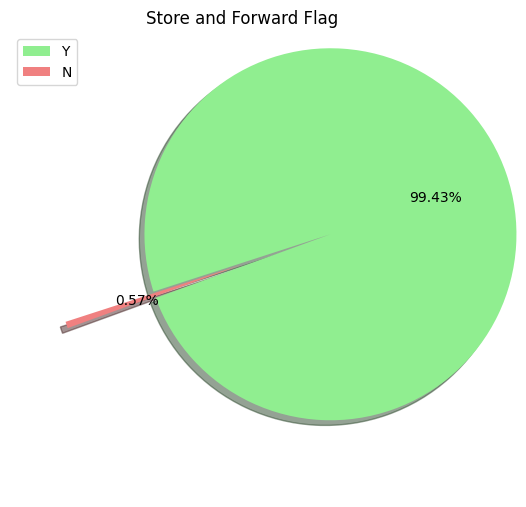

In [ ]:
import matplotlib.pyplot as plt
df["store_and_fwd_flag"].value_counts()

plt.figure(figsize=(6,8))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

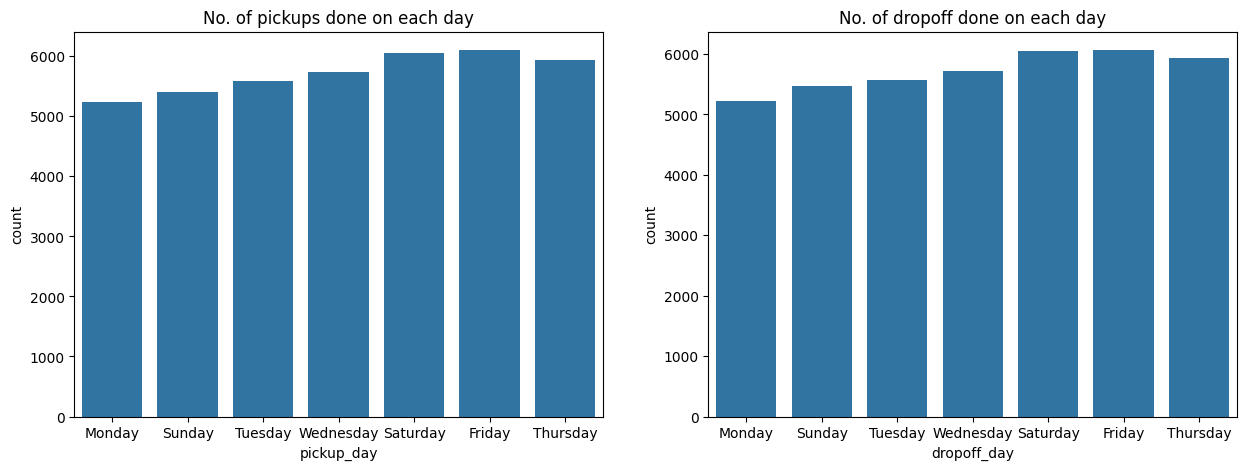

In [ ]:
import seaborn as sns

figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x="pickup_day",data=df,ax=ax[0])
ax[0].set_title('No. of pickups done on each day')
sns.countplot(x="dropoff_day",data=df,ax=ax[1])
ax[1].set_title('No. of dropoff done on each day')
plt.show()

In [ ]:
# setting timezones
def timezone(x):
  if x>=6 and x<10:
    return "morning"
  elif x>=10 and x<16:
    return "mid day"
  elif x>=16 and x<22:
    return "evening"
  elif x>=22 or x<6:
    return "late night"

df["pickup_time_zone"]=df.pickup_hour.apply(timezone)
df["dropoff_time_zone"]=df.dropoff_hour.apply(timezone)

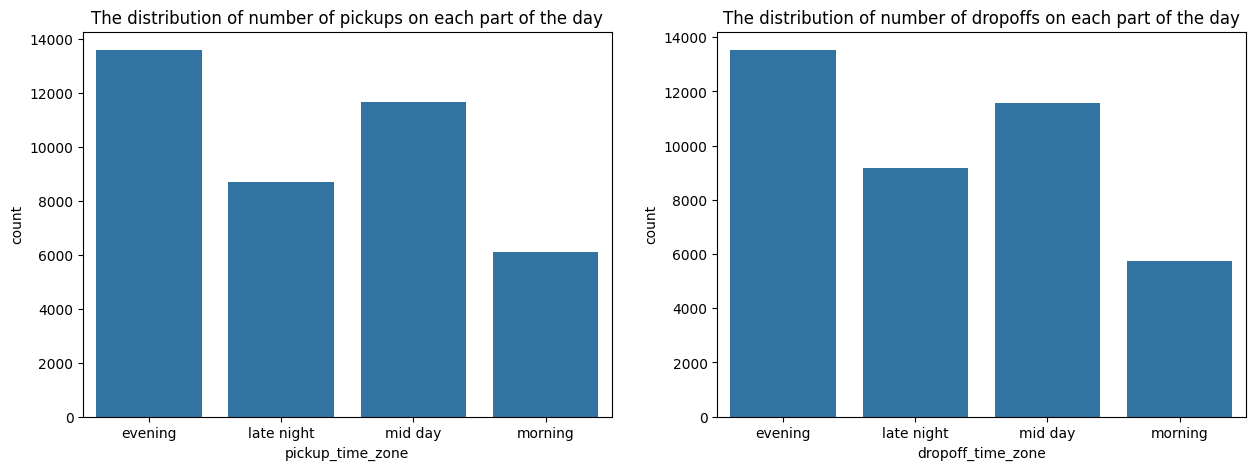

In [ ]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_time_zone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_time_zone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

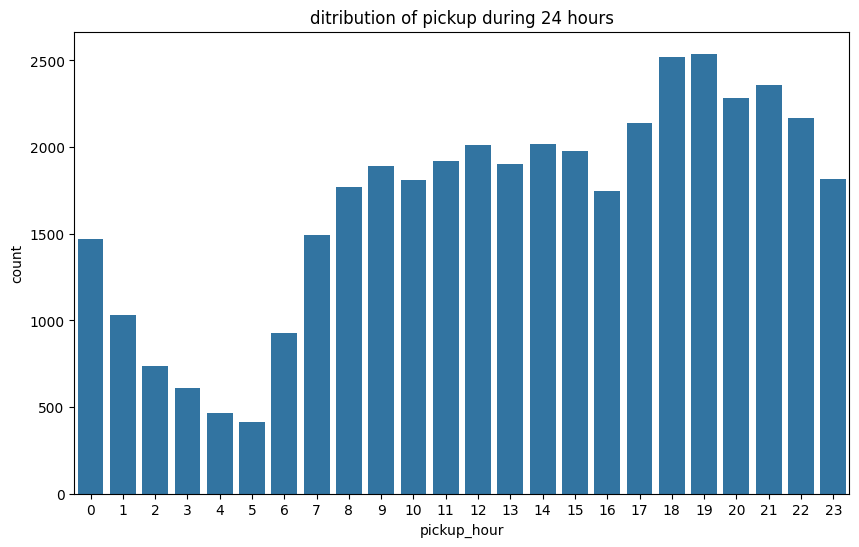

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=df["pickup_hour"])
plt.title("ditribution of pickup during 24 hours")
plt.show()

In [ ]:
df.passenger_count.value_counts()

passenger_count
1    28366
2     5747
5     2130
3     1606
6     1346
4      817
Name: count, dtype: int64

In [ ]:
numeric_feature=['passenger_count','distance','trip_duration_mins','pickup_hour', 'dropoff_hour']
numeric_feature

['passenger_count',
 'distance',
 'trip_duration_mins',
 'pickup_hour',
 'dropoff_hour']

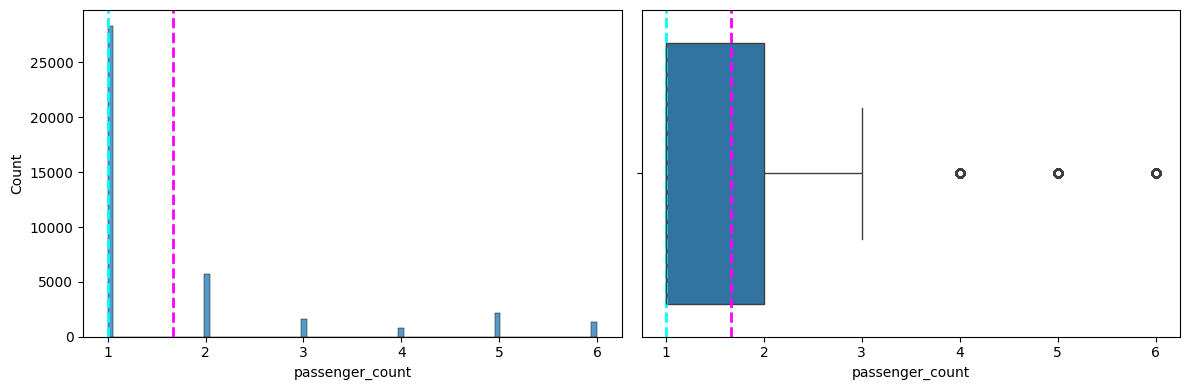

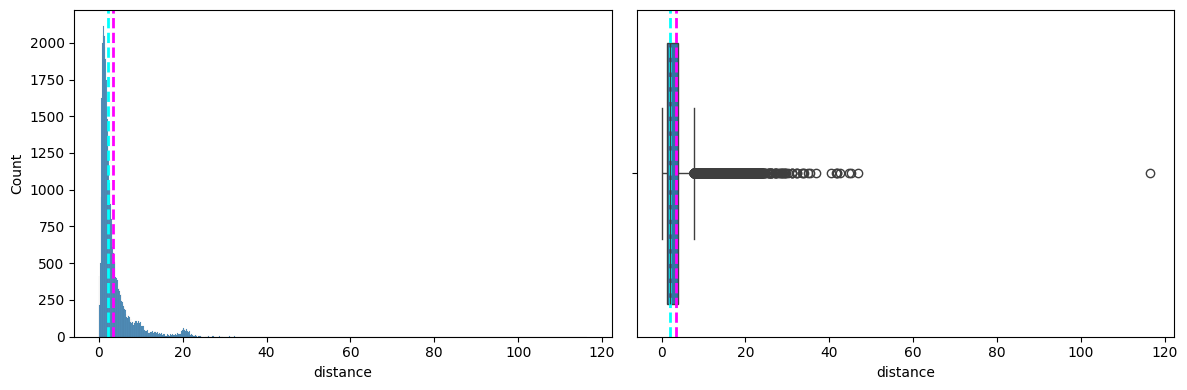

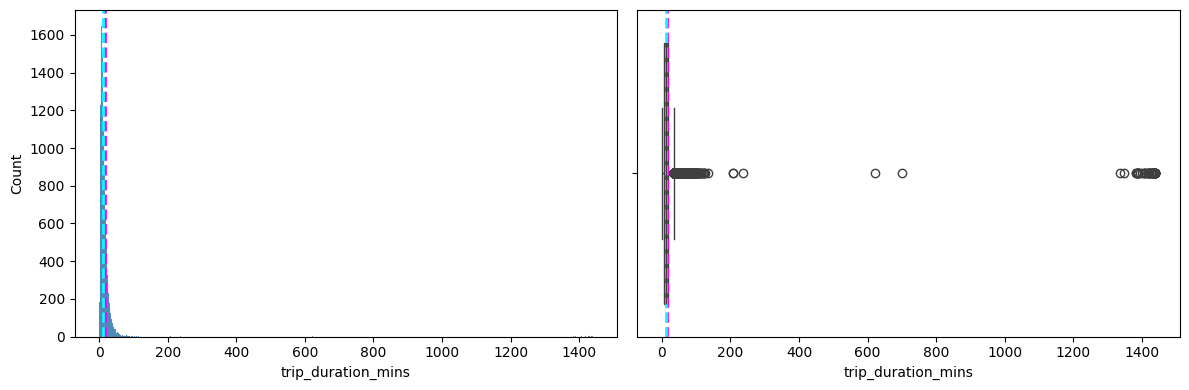

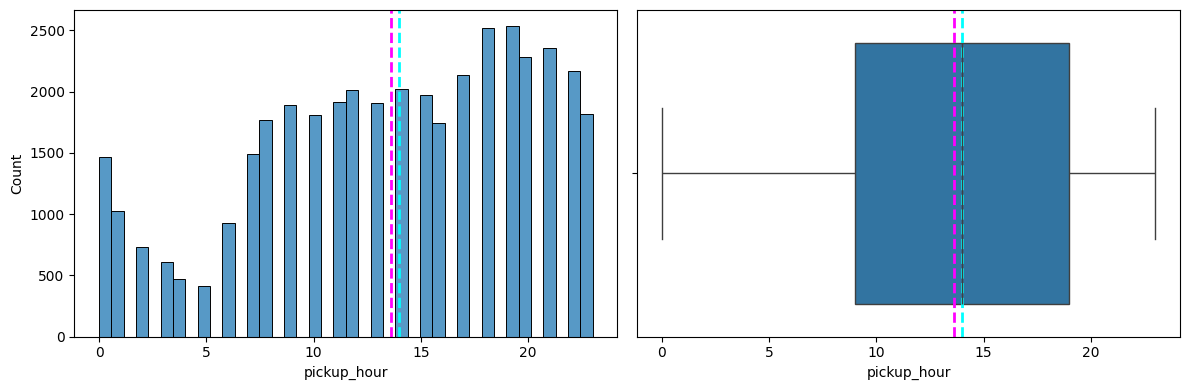

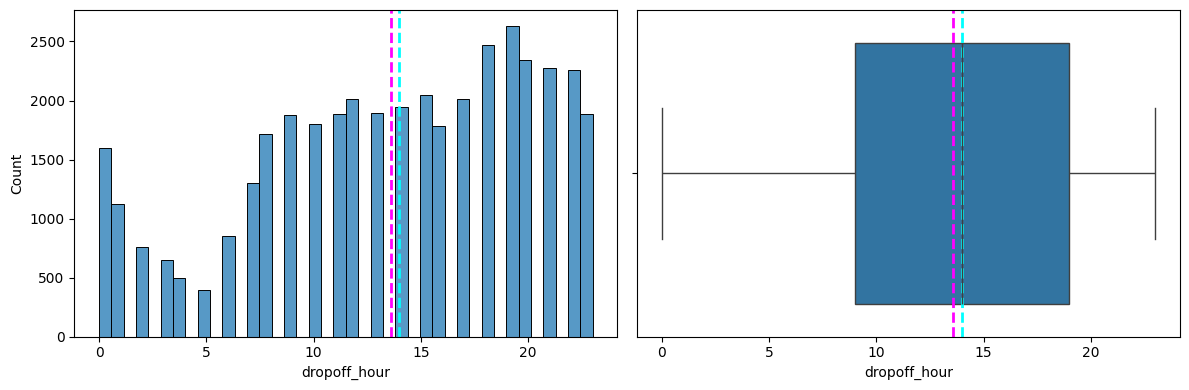

In [ ]:
for col in numeric_feature :
  fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
  sns.histplot(data=df,x=col,ax=ax[0])
  ax[0].axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[0].axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  sns.boxplot(data=df, x=col, ax=ax[1])
  ax[1].axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[1].axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.tight_layout()

<Axes: ylabel='distance'>

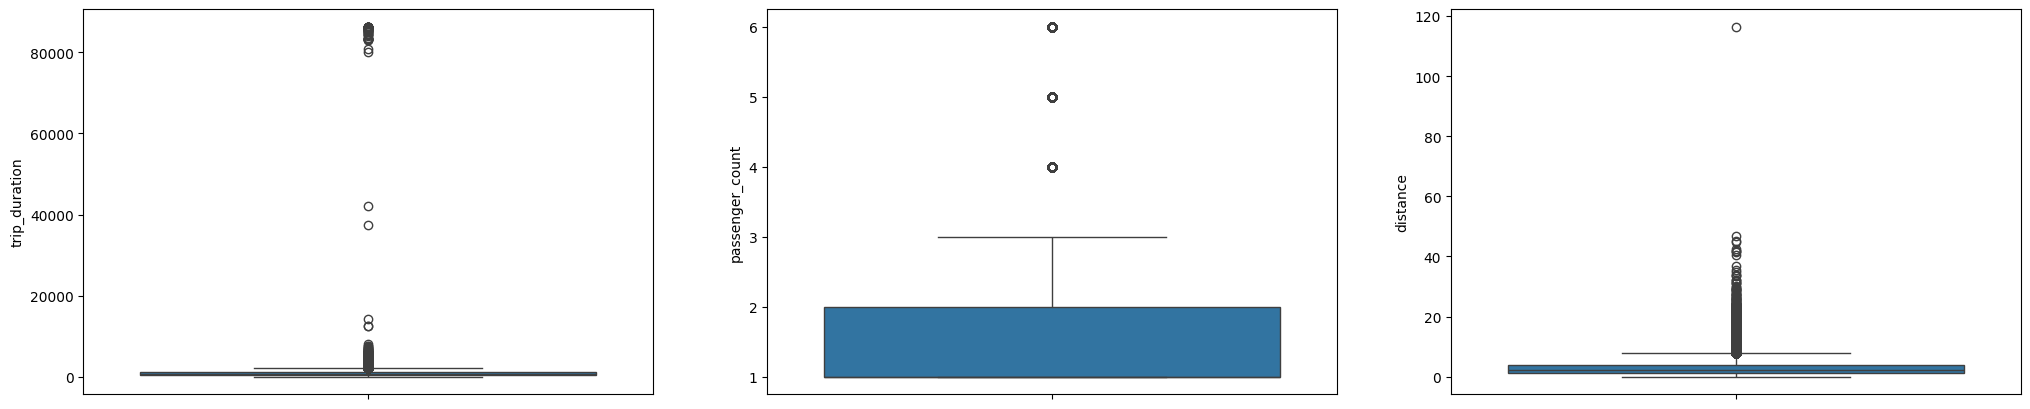

In [ ]:
#boxplot for visualizing outliers
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(25,5))
sns.boxplot(df["trip_duration"],ax=ax[0])
sns.boxplot(df['passenger_count'],ax=ax[1])
sns.boxplot(df['distance'],ax=ax[2])

In [ ]:
trip_duration_Q1=df['trip_duration'].quantile(0.25)
print('first quartile value ie 25th percentile of trip duration:',trip_duration_Q1)
trip_duration_Q2=df['trip_duration'].quantile(0.50)
print('second quartile value ie 50th percentile of trip duration:',trip_duration_Q2)
trip_duration_Q3=df['trip_duration'].quantile(0.75)
print('third quartile value ie 75th percentile of trip duration:',trip_duration_Q3)

first quartile value ie 25th percentile of trip duration: 394.0
second quartile value ie 50th percentile of trip duration: 660.0
third quartile value ie 75th percentile of trip duration: 1069.25


In [ ]:
IQR=trip_duration_Q3-trip_duration_Q1
print('IQR:',IQR)
trip_duration_lower_limit=trip_duration_Q1-1.5*IQR
trip_duration_upper_limit=trip_duration_Q3+1.5*IQR
print('The lower limit of trip duration:',trip_duration_lower_limit)
print('The upper limit of trip duration:',trip_duration_upper_limit)

IQR: 675.25
The lower limit of trip duration: -618.875
The upper limit of trip duration: 2082.125


In [ ]:
#removing outliers in trip_duration features
df=df[df['trip_duration']>0]
df=df[df['trip_duration']<trip_duration_upper_limit]
df.shape

(37990, 25)

In [ ]:
passenger_count_Q1=df['passenger_count'].quantile(0.25)
print('first quartile value ie 25th percentile of passenger count:',passenger_count_Q1)
passenger_count_Q2=df['passenger_count'].quantile(0.50)
print('second quartile value ie 50th percentile of passenger count:',passenger_count_Q2)
passenger_count_Q3=df['passenger_count'].quantile(0.75)
print('third quartile value ie 75th percentile of passenger count:',passenger_count_Q3)

first quartile value ie 25th percentile of passenger count: 1.0
second quartile value ie 50th percentile of passenger count: 1.0
third quartile value ie 75th percentile of passenger count: 2.0


In [ ]:
IQR= passenger_count_Q3 - passenger_count_Q1
passenger_count_lower_limit=passenger_count_Q1 - 1.5*IQR
passenger_count_upper_limit=passenger_count_Q3 + 1.5*IQR
print("The lower limit of passenger count:", passenger_count_lower_limit)
print("The upper limit of passenger count:", passenger_count_upper_limit)

The lower limit of passenger count: -0.5
The upper limit of passenger count: 3.5


In [ ]:
# Removing outliers
df=df[df['passenger_count']>0]
df=df[df['passenger_count']<passenger_count_upper_limit]
df.shape

(33905, 25)

In [ ]:
distance_Q1=df['distance'].quantile(0.25)
print('first quartile value ie 25th percentile of distance:',distance_Q1)
distance_Q2=df['distance'].quantile(0.50)
print('second quartile value ie 50th percentile of distance:',distance_Q2)
distance_Q3=df['distance'].quantile(0.75)
print('third quartile value ie 75th percentile of distance:',distance_Q3)

first quartile value ie 25th percentile of distance: 1.1951333278521392
second quartile value ie 50th percentile of distance: 1.97734142290241
third quartile value ie 75th percentile of distance: 3.4494584095855387


In [ ]:
IQR= distance_Q3 - distance_Q1
distance_lower_limit=distance_Q1 - 1.5*IQR
distance_upper_limit=distance_Q3 + 1.5*IQR
print("The lower limit of distance:", distance_lower_limit)
print("The upper limit of distance:", distance_upper_limit)

The lower limit of distance: -2.18635429474796
The upper limit of distance: 6.830946032185638


In [ ]:
# Removing outliers
df=df[df['distance']>0]
df=df[df['distance']<passenger_count_upper_limit]
df.shape

(25471, 25)

In [ ]:
# Step 3 : Data Preprocessing
df=pd.get_dummies(df,columns=['store_and_fwd_flag', 'pickup_weekday', 'dropoff_weekday'],drop_first=True)
df.shape

(25471, 35)

In [ ]:
features=['vendor_id', 'passenger_count', 'distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag_Y','pickup_weekday_1',
          'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4', 'pickup_weekday_5', 'pickup_weekday_6']
final_df=df[features]
final_df.shape

(25471, 14)

In [ ]:
# Model Evaluation Function
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from numpy import math

def evaluation_metrics (x_train,y_train,y_predicted):
  MSE=round(mean_squared_error(y_true=y_train, y_pred=y_predicted),4)
  RMSE=math.sqrt(MSE)
  R2_score=r2_score(y_true=y_train, y_pred=y_predicted)
  Adjusted_R2_score=1-((1-( R2_score))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))

  print("Mean Squared Error:",MSE,"Root Mean Squared Error:", RMSE)
  print("R2 Score :",R2_score,"Adjusted R2 Score :",Adjusted_R2_score)

  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100], color='red')
  plt.plot(np.array(y_train)[:100], color='green')
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')

  return(MSE,RMSE,R2_score,Adjusted_R2_score)

<ipython-input-47-9a063e3411b3>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
# Step 4 : Implementation using ML Models
x=final_df[features]
y=df["trip_duration_mins"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Evaluation of Linear Regression model for Training Dataset - 
Mean Squared Error: 18.8926 Root Mean Squared Error: 4.3465618596771405
R2 Score : 0.37311317269390953 Adjusted R2 Score : 0.3726821321957864

Evaluation of Linear Regression model for Testing Dataset - 
Mean Squared Error: 19.5773 Root Mean Squared Error: 4.424624277834221
R2 Score : 0.357594125534098 Adjusted R2 Score : 0.35582371564383763


(19.5773, 4.424624277834221, 0.357594125534098, 0.35582371564383763)

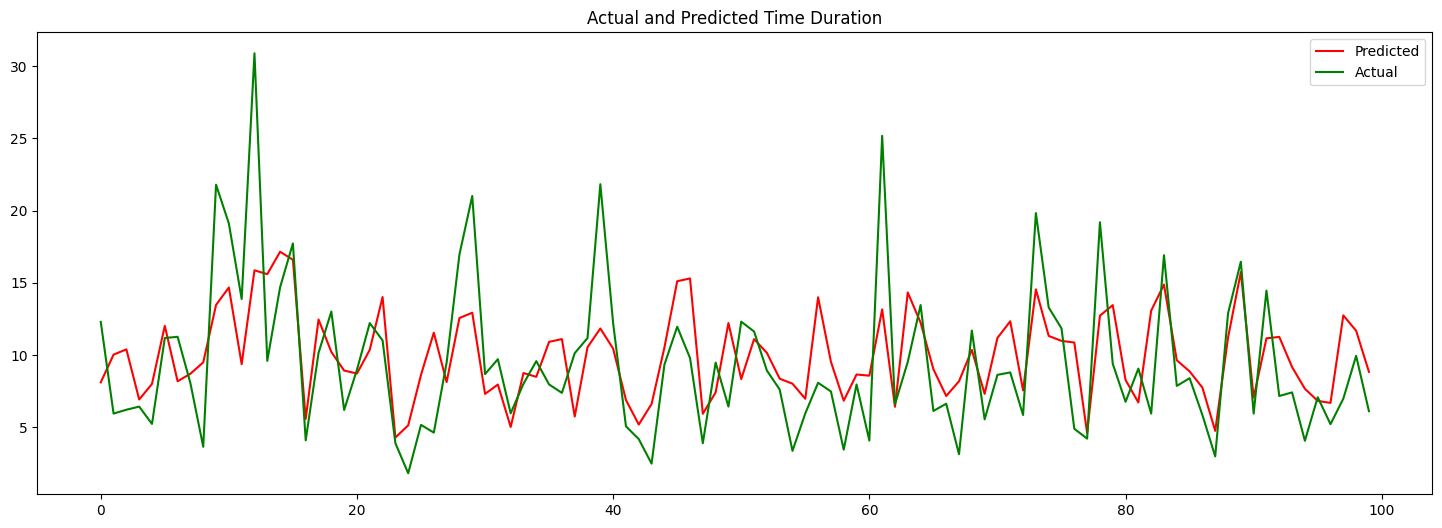

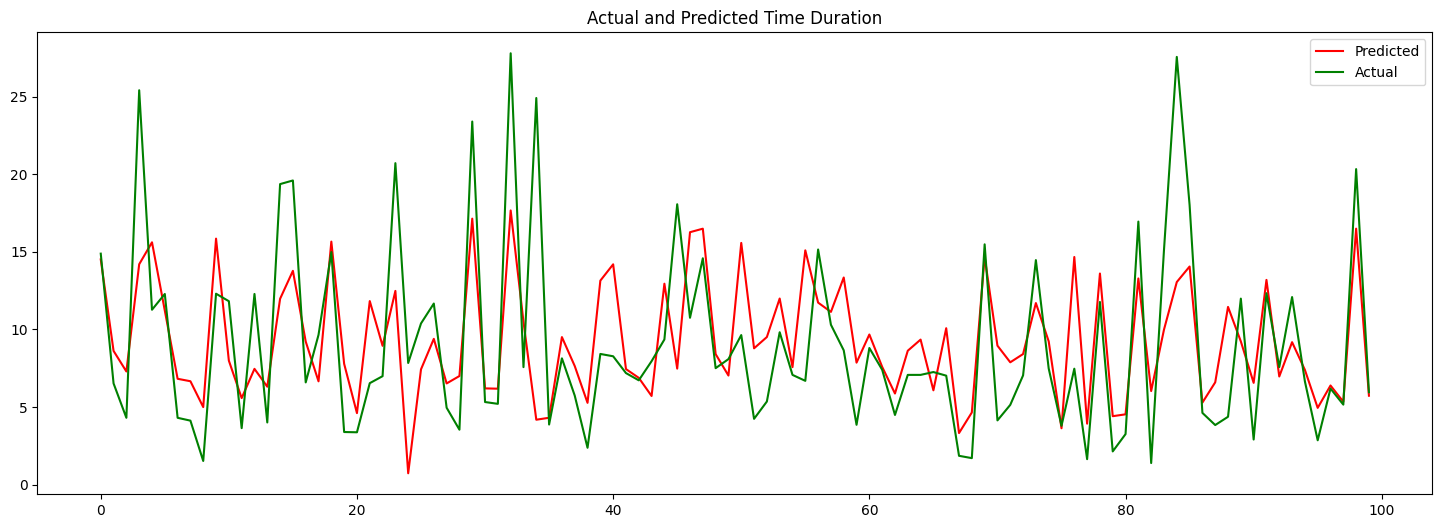

In [ ]:
# 4.1 - LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
a=lr.score(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print("Evaluation of Linear Regression model for Training Dataset - ")
evaluation_metrics(x_train,y_train,y_pred_train)
print("\nEvaluation of Linear Regression model for Testing Dataset - ")
evaluation_metrics(x_test,y_test,y_pred_test)

Evaluation of Lasso Regression model for Training Dataset - 
Mean Squared Error: 19.5592 Root Mean Squared Error: 4.422578433448072
R2 Score : 0.3509951762015302 Adjusted R2 Score : 0.3505489276119138

Evaluation of Lasso Regression model for Testing Dataset - 
Mean Squared Error: 20.2485 Root Mean Squared Error: 4.499833330246799
R2 Score : 0.33556934313371123 Adjusted R2 Score : 0.33373823502423716


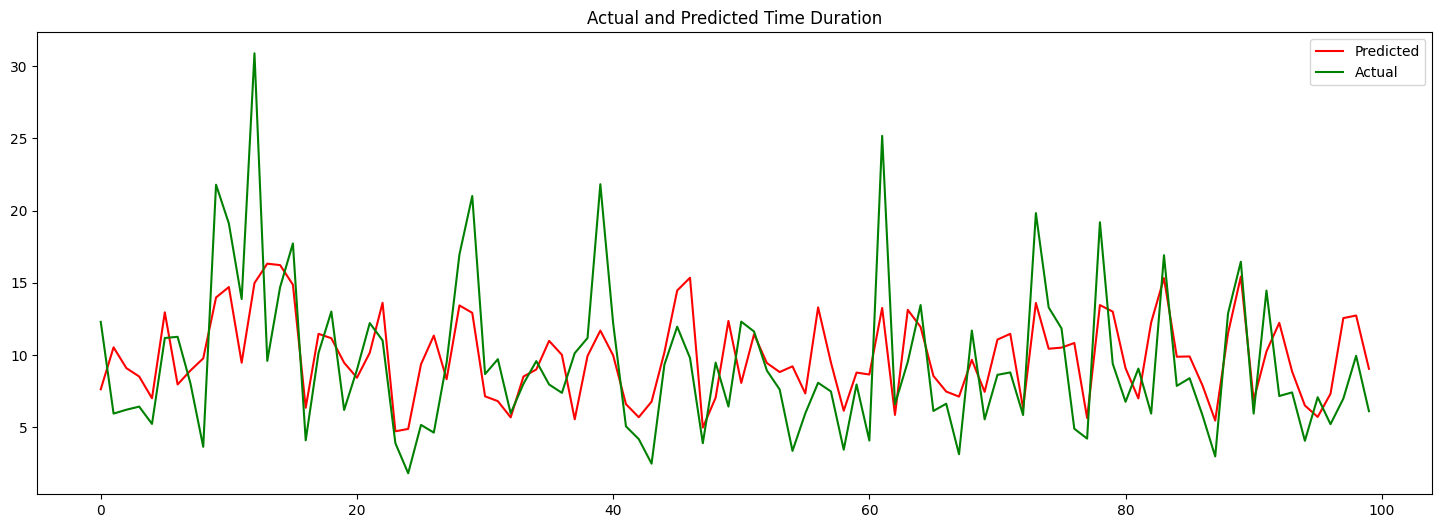

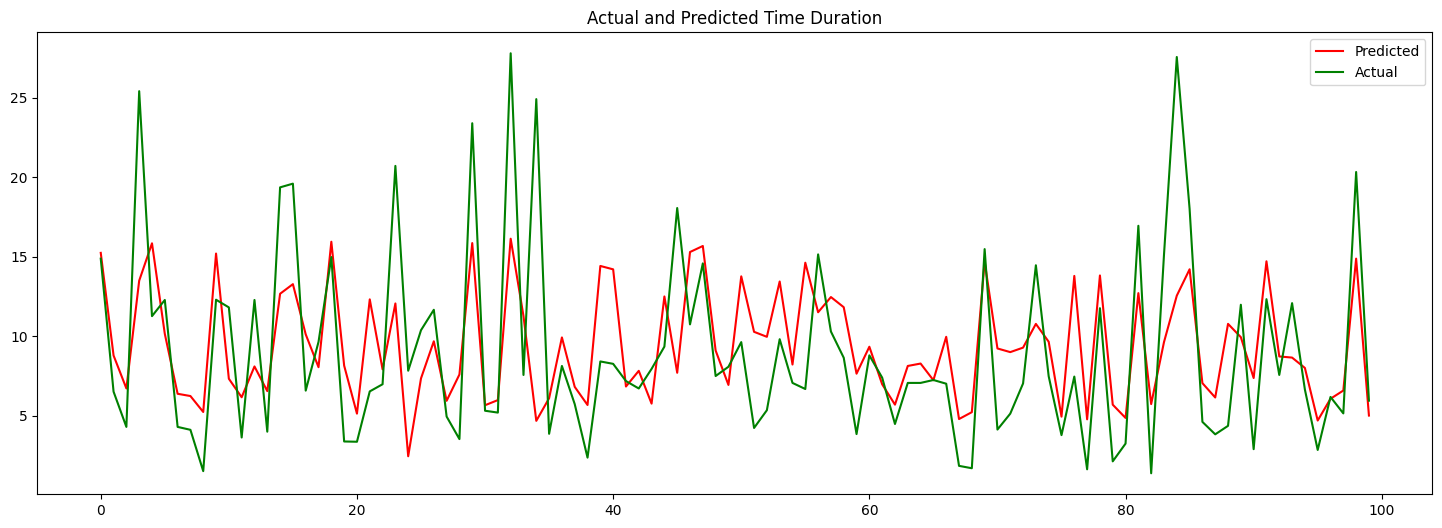

In [ ]:
# 4.2 - LASSO & RIDGE REGRESSION
# 4.2.1 - LASSO REGRESSION
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)  # You can adjust alpha as needed
lasso.fit(x_train, y_train)
lasso_score_train = lasso.score(x_train, y_train)
y_pred_lasso_train = lasso.predict(x_train)
y_pred_lasso_test = lasso.predict(x_test)
print("Evaluation of Lasso Regression model for Training Dataset - ")
lasso_metrics_train = evaluation_metrics(x_train, y_train, y_pred_lasso_train)
print("\nEvaluation of Lasso Regression model for Testing Dataset - ")
lasso_metrics_test = evaluation_metrics(x_test, y_test, y_pred_lasso_test)

Evaluation of Ridge Regression model for Training Dataset - 
Mean Squared Error: 18.9041 Root Mean Squared Error: 4.347884543085292
R2 Score : 0.3727307162625213 Adjusted R2 Score : 0.372299412791556

Evaluation of Ridge Regression model for Testing Dataset - 
Mean Squared Error: 19.5585 Root Mean Squared Error: 4.422499293386037
R2 Score : 0.3582120759409254 Adjusted R2 Score : 0.3564433690635973


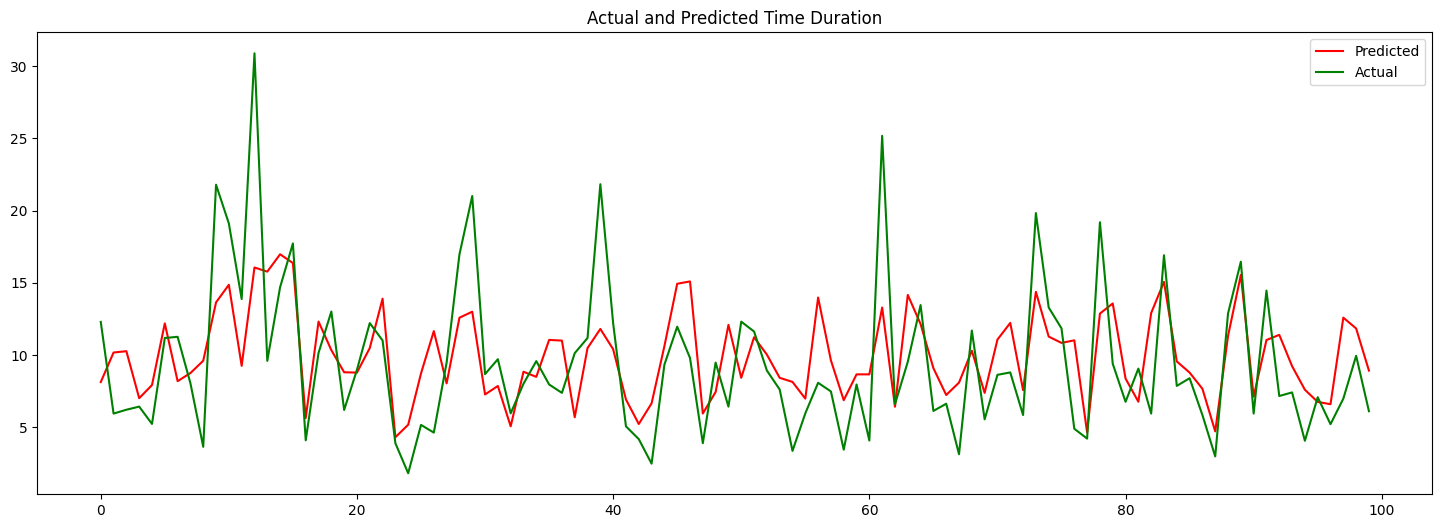

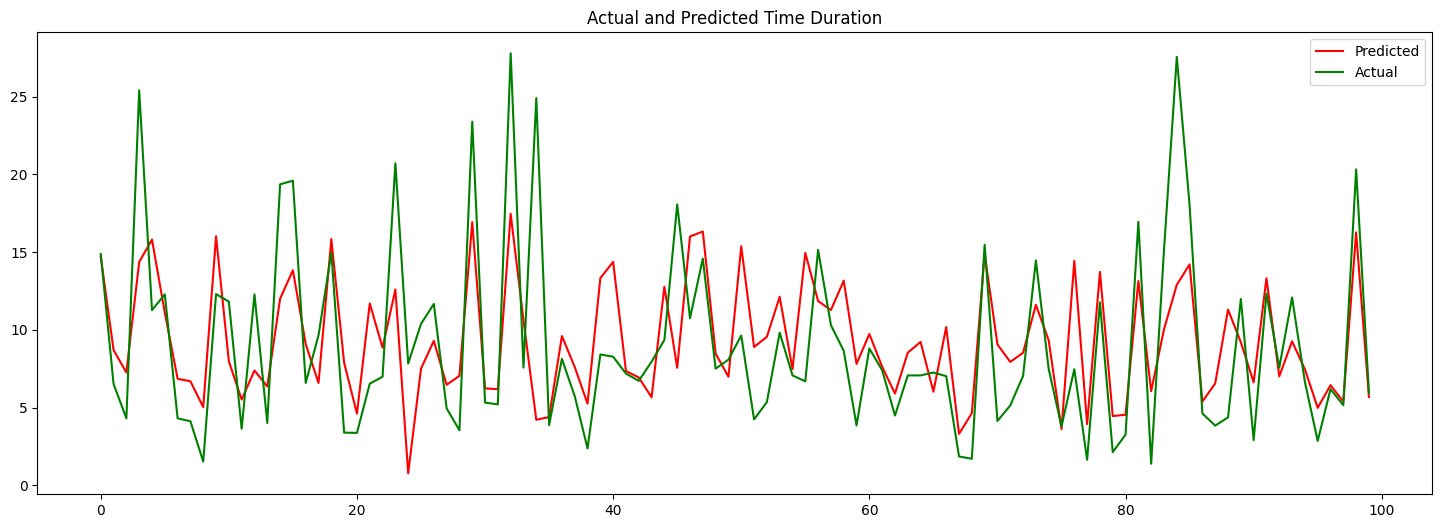

In [ ]:
# 4.2.2 - RIDGE REGRESSION
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)  # You can adjust alpha as needed
ridge.fit(x_train, y_train)
ridge_score_train = ridge.score(x_train, y_train)
y_pred_ridge_train = ridge.predict(x_train)
y_pred_ridge_test = ridge.predict(x_test)
print("Evaluation of Ridge Regression model for Training Dataset - ")
ridge_metrics_train = evaluation_metrics(x_train, y_train, y_pred_ridge_train)
print("\nEvaluation of Ridge Regression model for Testing Dataset - ")
ridge_metrics_test = evaluation_metrics(x_test, y_test, y_pred_ridge_test)

Evaluation of SVM Regression model for Training Dataset - 
Mean Squared Error: 19.5932 Root Mean Squared Error: 4.426420675896045
R2 Score : 0.3498670207890675 Adjusted R2 Score : 0.3494199964921787

Evaluation of SVM Regression model for Testing Dataset - 
Mean Squared Error: 20.3821 Root Mean Squared Error: 4.514653918076113
R2 Score : 0.33118399903435236 Adjusted R2 Score : 0.3293408053309037


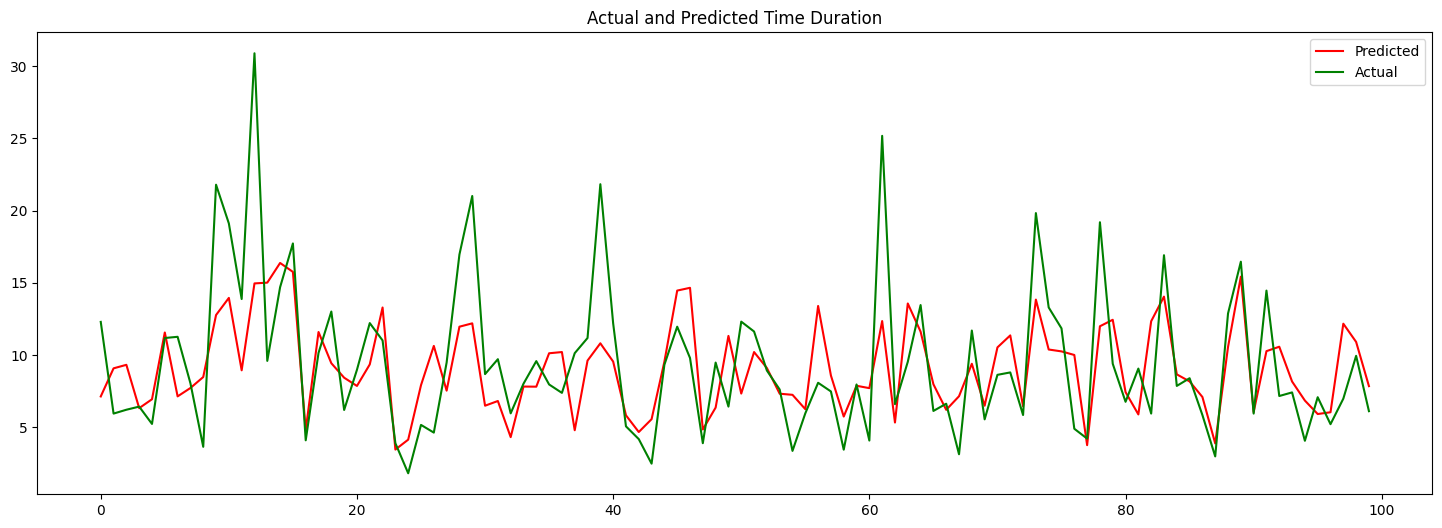

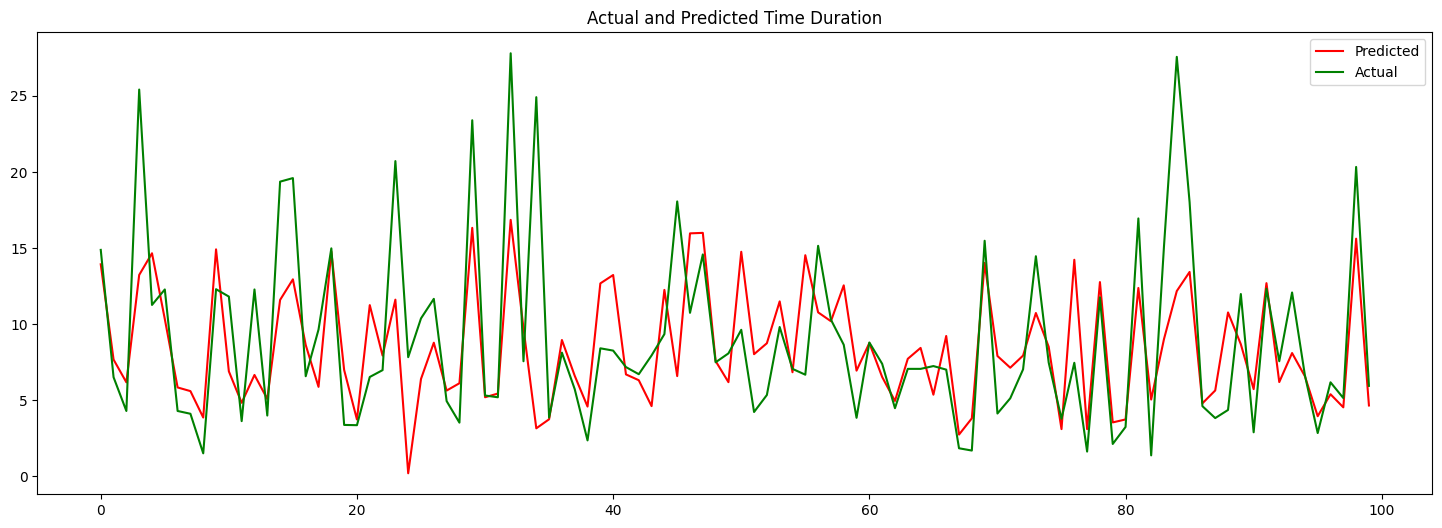

In [ ]:
# 4.3 - SUPPORT VECTOR MACHINE
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# SVM Regression
svm_regressor = SVR(kernel='linear')  # You can also try other kernels like 'rbf', 'poly', etc.
svm_regressor.fit(x_train_scaled, y_train)
svm_score_train = svm_regressor.score(x_train_scaled, y_train)
y_pred_svm_train = svm_regressor.predict(x_train_scaled)
y_pred_svm_test = svm_regressor.predict(x_test_scaled)

print("Evaluation of SVM Regression model for Training Dataset - ")
svm_metrics_train = evaluation_metrics(x_train_scaled, y_train, y_pred_svm_train)
print("\nEvaluation of SVM Regression model for Testing Dataset - ")
svm_metrics_test = evaluation_metrics(x_test_scaled, y_test, y_pred_svm_test)

Evaluation of KNN Regression model for Training Dataset - 
Mean Squared Error: 12.7481 Root Mean Squared Error: 3.570448151142935
R2 Score : 0.5769987623478121 Adjusted R2 Score : 0.5767079113421085

Evaluation of KNN Regression model for Testing Dataset - 
Mean Squared Error: 19.8401 Root Mean Squared Error: 4.454222715581249
R2 Score : 0.348970476615043 Adjusted R2 Score : 0.3471763007631947


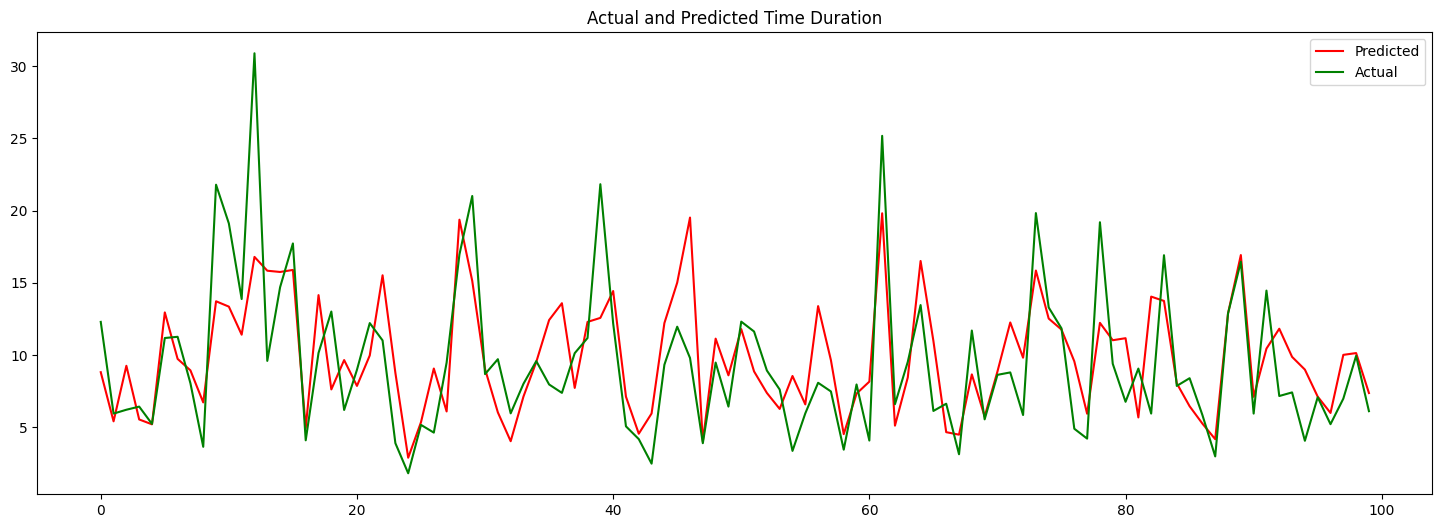

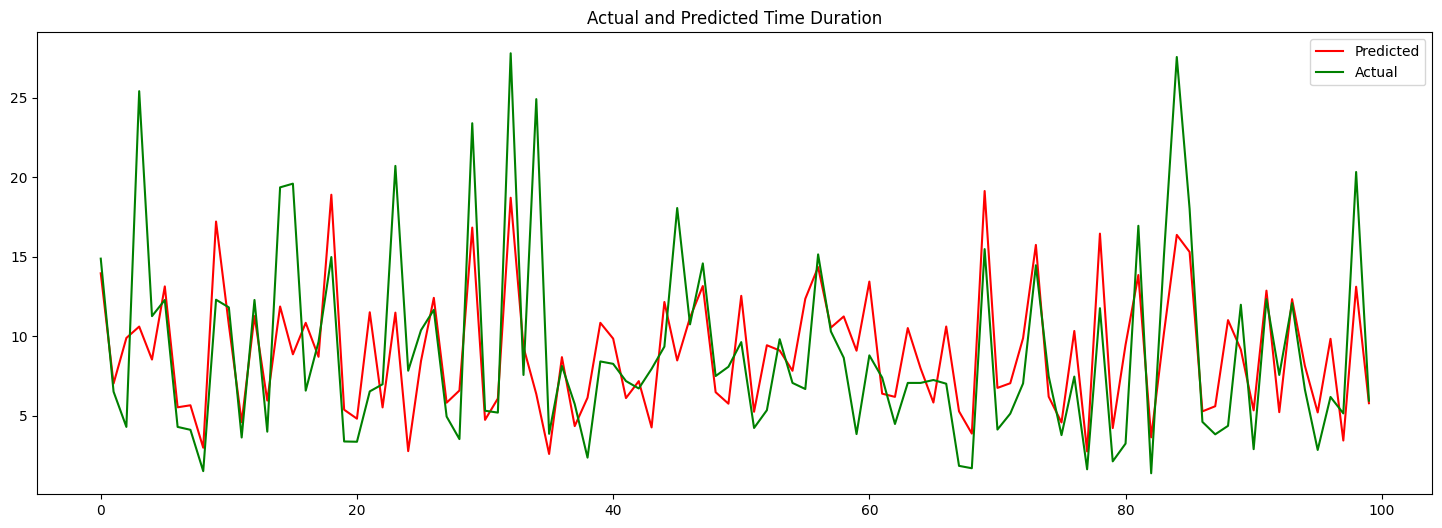

In [ ]:
# 4.4 - K NEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# KNN Regression
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_regressor.fit(x_train_scaled, y_train)
knn_score_train = knn_regressor.score(x_train_scaled, y_train)
y_pred_knn_train = knn_regressor.predict(x_train_scaled)
y_pred_knn_test = knn_regressor.predict(x_test_scaled)

print("Evaluation of KNN Regression model for Training Dataset - ")
knn_metrics_train = evaluation_metrics(x_train_scaled, y_train, y_pred_knn_train)
print("\nEvaluation of KNN Regression model for Testing Dataset - ")
knn_metrics_test = evaluation_metrics(x_test_scaled, y_test, y_pred_knn_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=30; total time=   0.1s
[CV] END max_depth=4, min

(19.1477, 4.375808496723777, 0.3716891836479149, 0.3699576184059997)

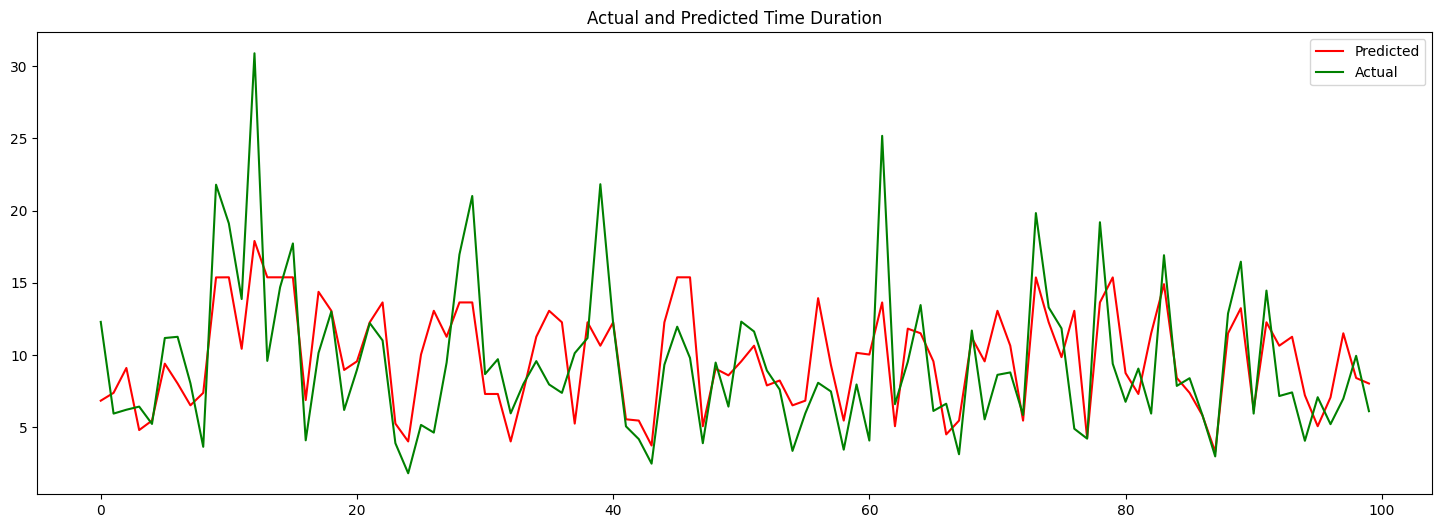

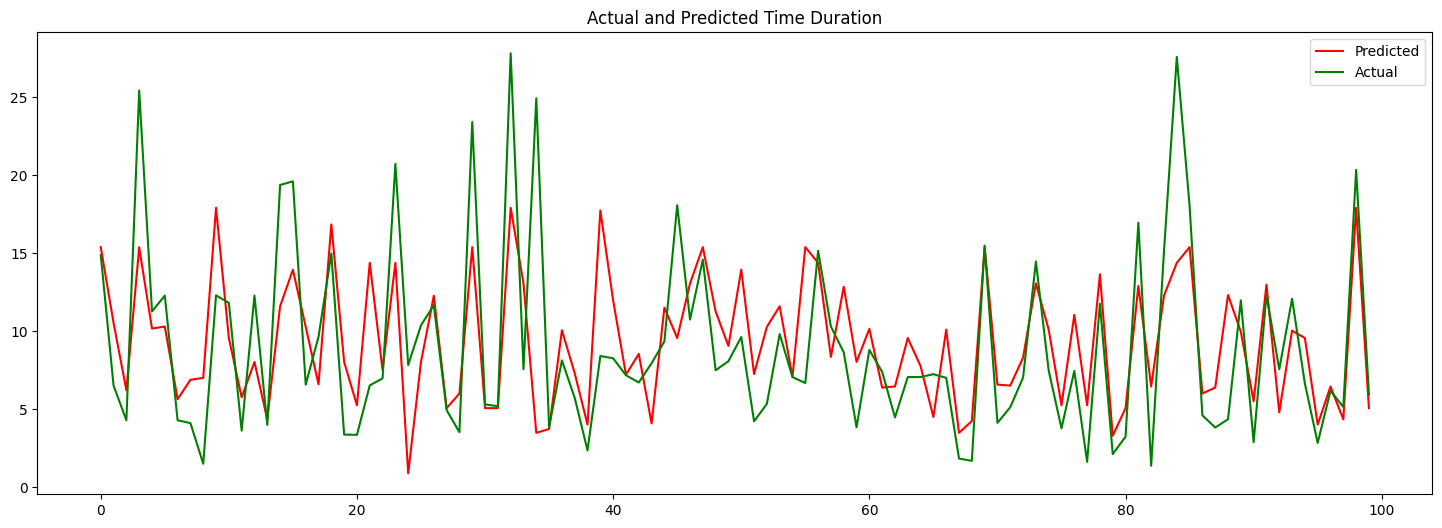

In [ ]:
# 4.4 - DECISION TREES
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
max_depth = [4,6,8,10,12]
min_samples_split = [10,20,30]
min_samples_leaf = [6,10,16,20]
param_decision_tree = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
DTR = DecisionTreeRegressor()
decision_tree_grid = GridSearchCV(estimator=DTR,
                       param_grid = param_decision_tree,
                       cv = 5, verbose=2, scoring='r2')
decision_tree_grid.fit(x_train,y_train)
decision_tree_grid.best_estimator_
decision_tree_grid.best_score_
decision_tree_optimal_model =decision_tree_grid.best_estimator_
y_predict_train_decision_tree=decision_tree_optimal_model.predict(x_train)
y_predict_test_decision_tree=decision_tree_optimal_model.predict(x_test)
print("Evaluation of Decision Trees model for Training Dataset - ")
evaluation_metrics(x_train,y_train,y_predict_train_decision_tree)
print("Evaluation of Decision Trees model for Testing Dataset - ")
evaluation_metrics(x_test,y_test,y_predict_test_decision_tree)

{'n_estimators': [20, 22, 24], 'max_features': [0.6], 'max_depth': [10, 16], 'max_samples': [0.75, 1.0]}
Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=   0.8s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=   1.3s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=   1.3s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=   0.8s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=   0.6s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=   0.6s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=   0.5s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=   0.5s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=22; t

(17.5522, 4.189534580356152, 0.42404457435780385, 0.4224572956257191)

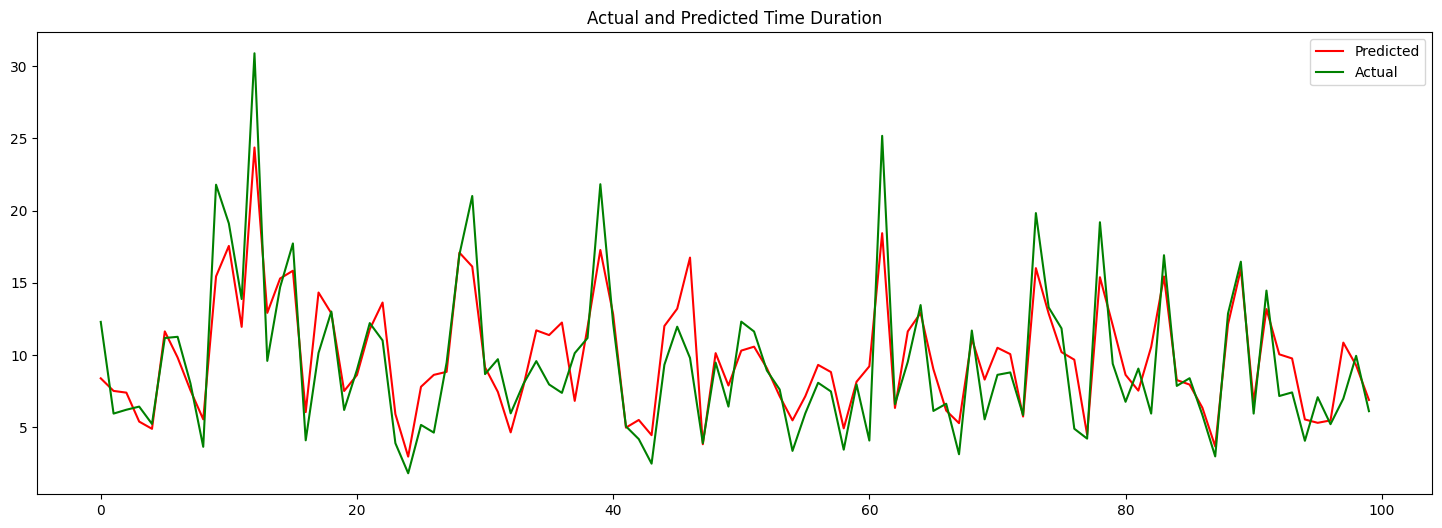

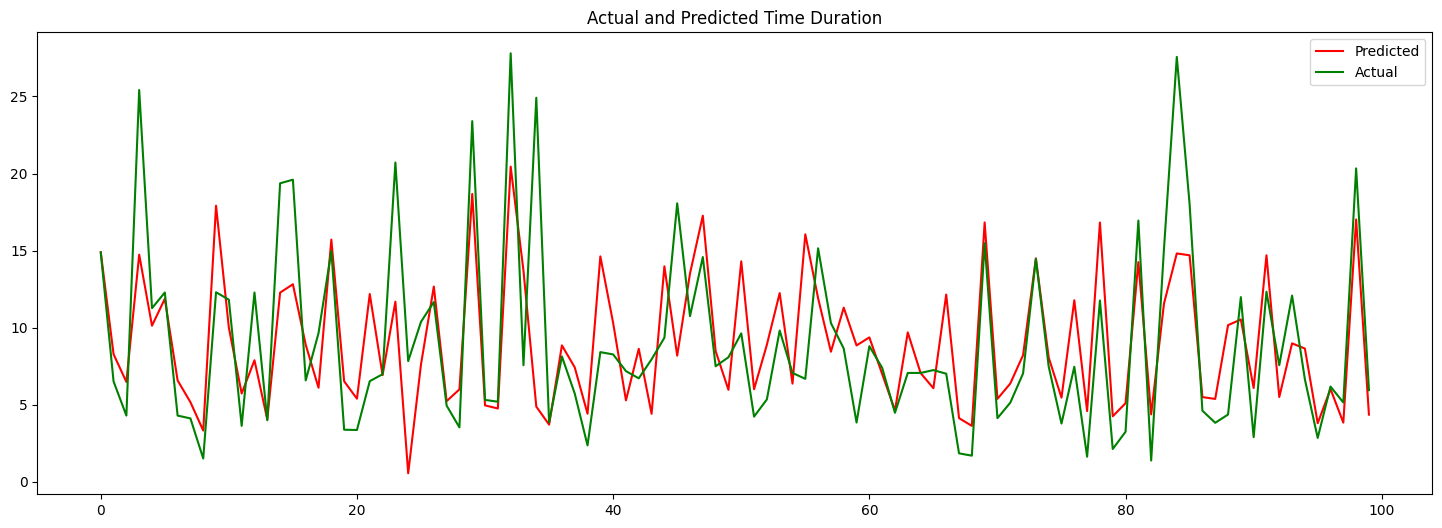

In [ ]:
# 4.6 - RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
n_estimators=[20,22,24]
max_features=[0.6]
max_depth=[10,16]
max_samples=[0.75,1.0]
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples,
            }
print(param_grid)
RF_grid=GridSearchCV(estimator=RFR,param_grid=param_grid,cv=2,verbose=2)
RF_grid.fit(x_train,y_train)
RF_grid.best_params_
RF_grid.best_score_
Random_Forest_optimal_model =RF_grid.best_estimator_
y_predict_train_Random_Forest=Random_Forest_optimal_model.predict(x_train)
y_predict_test_Random_Forest=Random_Forest_optimal_model.predict(x_test)
print("Evaluation of Random Forest model for Training Dataset - ")
evaluation_metrics(x_train,y_train,y_predict_train_Random_Forest)
print("Evaluation of Random Forest model for Testing Dataset - ")
evaluation_metrics(x_test,y_test,y_predict_test_Random_Forest)

In [ ]:
# Step 5 : Comparing Evaluation Metrics of the Models
score_values=[[22.525,4.746,0.48710009447510005,0.4870921983622618],
              [20.2485,4.43,0.351,0,351],
              [18.9041,4.345,0.3727,0.373],
              [16.713,4.0881,0.4456,0.44508]
              [18.5693,4.309211064684578,0.5771718360098075,0.5771653265547303],
              [14.3663,3.790290226354705,0.672873788148407,0.6728687520283896]]
df_score = pd.DataFrame(score_values,columns=['MSE', 'RMSE', 'R2', 'AdjustedR2'], index=['Linear Regression','Lasso Regression','Ridge','SVM','Decision Tree', 'Random Forest')]
df_score

,MSE,RMSE,R2,AdjustedR2
Linear Regression,22.5249,4.746040,0.487100,0.487092
Decision Tree,18.5693,4.309211,0.577172,0.577165
Random Forest,14.3663,3.790290,0.672874,0.672869
Xgboost,14.7339,3.838476,0.664503,0.664498
Gradientboost,19.6792,4.436124,0.551898,0.551891


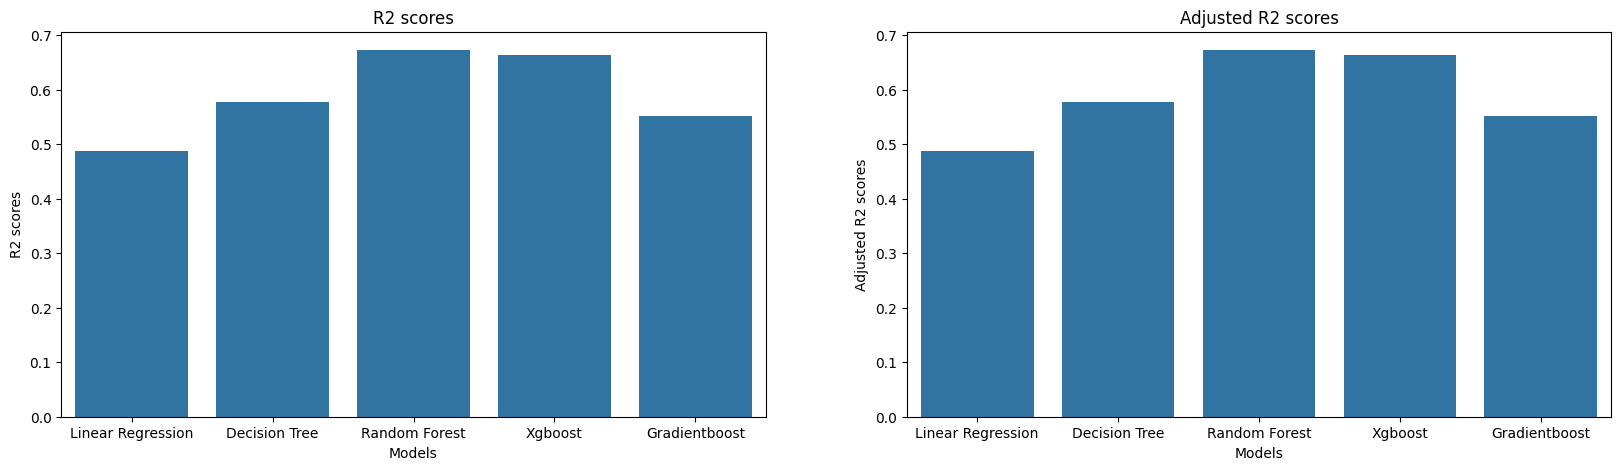

In [ ]:
#bar plot for R2 score
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'Random Forest', 'Xgboost', 'Gradientboost']
ax1.set_title('R2 scores')
ax = sns.barplot(x = x_, y='R2', data =df_score , ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('R2 scores')

# barplot for adjustedR2
ax = sns.barplot(x = x_, y='AdjustedR2',  data = df_score, ax = ax2)
ax2.set_title('Adjusted R2 scores')
ax.set_xlabel('Models')
ax.set_ylabel('Adjusted R2 scores')
plt.show()

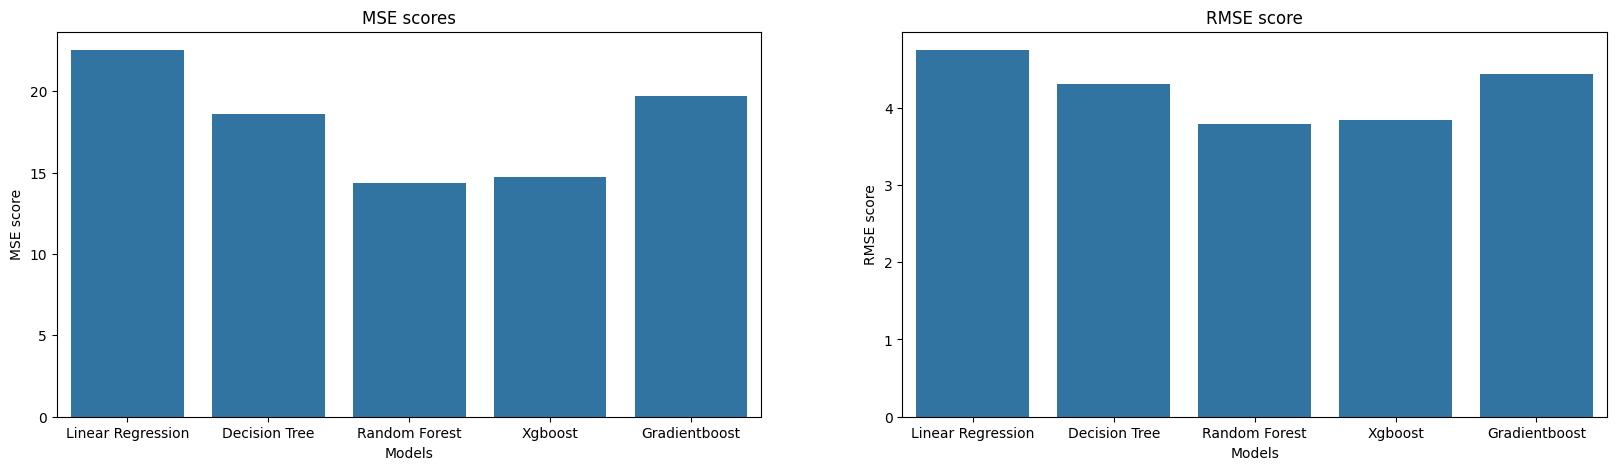

In [ ]:
#barplot of MSE score
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'Random Forest', 'Xgboost', 'Gradientboost']
ax1.set_title('MSE scores')
ax = sns.barplot(x = x_, y='MSE', data =df_score , ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('MSE score')

# barplot for RMSE score
ax = sns.barplot(x = x_, y='RMSE',  data = df_score, ax = ax2)
ax2.set_title('RMSE score')
ax.set_xlabel('Models')
ax.set_ylabel('RMSE score')
plt.show()